In [98]:
import pandas as pd
from prophet import Prophet 
from matplotlib import pyplot as plt
from prophet.make_holidays import make_holidays_df
import numpy as np

In [2]:
#data Import 
companies = pd.read_csv('./sp500_companies.csv')
stocks_data = pd.read_csv('./sp500_stocks.csv')

In [3]:
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
stocks_data.index = stocks_data['Date']
# nan_data = stocks_data[stocks_data.isnull().any(axis=1)]

merged_df = pd.merge(stocks_data, companies[['Symbol', 'Sector']], on='Symbol')
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date', inplace=True)
merged_data = merged_df.groupby(['Date', 'Sector'])['Adj Close'].mean().unstack()
merged_data

Sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
Date,,,,,,,,,,,
2010-01-04,34.012166,12.995008,41.194379,21.889168,32.389868,27.136903,29.552537,26.449341,26.330525,21.982337,17.933997
2010-01-05,33.986792,14.337063,41.524853,21.960018,32.607472,27.328649,29.415474,26.550981,26.422507,21.966350,17.760773
2010-01-06,34.522872,14.199266,41.308213,22.070072,32.954280,27.271699,29.389430,26.639205,26.370791,21.954103,17.857559
2010-01-07,34.395883,14.126797,41.818423,22.070496,32.861634,27.633384,29.592013,26.878117,26.447302,21.924534,17.773497
2010-01-08,34.539964,14.076779,41.703027,21.986092,33.056766,27.641868,29.628393,27.179446,26.270007,22.050686,17.758387
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-05,161.943636,162.588856,479.067654,111.512568,148.631869,211.260623,232.126863,252.816716,146.143949,252.320665,94.842811
2024-12-06,161.722271,164.377728,483.959660,111.273783,146.762967,210.512560,231.901587,251.926571,146.546452,253.530123,93.877630
2024-12-09,161.052273,159.609545,484.121671,111.904594,146.140910,207.930896,233.789523,249.374431,146.339999,250.912440,92.205063


In [5]:
#2013~2023 -> 2024 (산업은 열만 바꾸면 되서 한 산업군 씩만 코드를 올리겠습니다)
basic_materials = merged_data[['Basic Materials']].reset_index()
basic_materials.columns = ['ds', 'y']

# 날짜 형식 변환
basic_materials['ds'] = pd.to_datetime(basic_materials['ds'])

# 2013년부터 2023년까지 학습용 데이터와 2024년 테스트 데이터로 분할
train_data = basic_materials[(basic_materials['ds'] >= '2013-01-01') & (basic_materials['ds'] < '2024-01-01')]
test_data = basic_materials[basic_materials['ds'].dt.year == 2024]

# Prophet 모델 생성 및 학습
model = Prophet()
model.fit(train_data)

12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:00 - cmdstanpy - INFO - Chain [1] done processing


In [6]:

#2013~2022 -> 2023 예측
basic_materials = merged_data[['Basic Materials']].reset_index()
basic_materials.columns = ['ds', 'y']

# 날짜 형식 변환
basic_materials['ds'] = pd.to_datetime(basic_materials['ds'])


In [7]:
# 2013년부터 2022년까지 학습용 데이터와 2023년 테스트 데이터로 분할
train_data = basic_materials[(basic_materials['ds'] >= '2013-01-01') & (basic_materials['ds'] < '2023-01-01')]
test_data = basic_materials[basic_materials['ds'].dt.year == 2023]

In [106]:
# Prophet 모델 생성 및 학습
model = Prophet(
    changepoint_prior_scale=0.1,  # 변화점을 좀 더 쉽게 반영
    seasonality_prior_scale=15
    #,
    #,    # 계절성을 좀 더 반영
    #seasonality_mode = 'multiplicative'
)
model.fit(train_data)

# 미래 데이터 생성 (2023년 예측)
future = model.make_future_dataframe(periods=365)  # 2023년 전체 예측
forecast = model.predict(future)

14:31:09 - cmdstanpy - INFO - Chain [1] start processing
14:31:09 - cmdstanpy - INFO - Chain [1] done processing


In [107]:
merged_data.head()

Sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
Date,,,,,,,,,,,
2010-01-04,34.012166,12.995008,41.194379,21.889168,32.389868,27.136903,29.552537,26.449341,26.330525,21.982337,17.933997
2010-01-05,33.986792,14.337063,41.524853,21.960018,32.607472,27.328649,29.415474,26.550981,26.422507,21.966350,17.760773
2010-01-06,34.522872,14.199266,41.308213,22.070072,32.954280,27.271699,29.389430,26.639205,26.370791,21.954103,17.857559
2010-01-07,34.395883,14.126797,41.818423,22.070496,32.861634,27.633384,29.592013,26.878117,26.447302,21.924534,17.773497
2010-01-08,34.539964,14.076779,41.703027,21.986092,33.056766,27.641868,29.628393,27.179446,26.270007,22.050686,17.758387


In [108]:
#2022년 1년 학습 후 2023년 10일 예측
Consumer_Cyclical = merged_data['Consumer Cyclical'].reset_index()
Consumer_Cyclical.columns = ['ds', 'y']

# 날짜 형식 변환
Consumer_Cyclical['ds'] = pd.to_datetime(Consumer_Cyclical['ds'])

# 2022년 학습용 데이터와 2023년 10일 테스트 데이터로 분할
train_data = Consumer_Cyclical[(Consumer_Cyclical['ds'] >= '2022-01-01') & (Consumer_Cyclical['ds'] < '2023-01-01')]
test_data = Consumer_Cyclical[(Consumer_Cyclical['ds'] >= '2023-01-01') & (Consumer_Cyclical['ds'] < '2023-01-11')]

# Prophet 모델 생성 및 학습
model = Prophet()
model.fit(train_data)

14:31:12 - cmdstanpy - INFO - Chain [1] start processing
14:31:12 - cmdstanpy - INFO - Chain [1] done processing


14:26:14 - cmdstanpy - INFO - Chain [1] start processing
14:26:14 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\mandy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mandy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mandy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mandy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mandy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWa

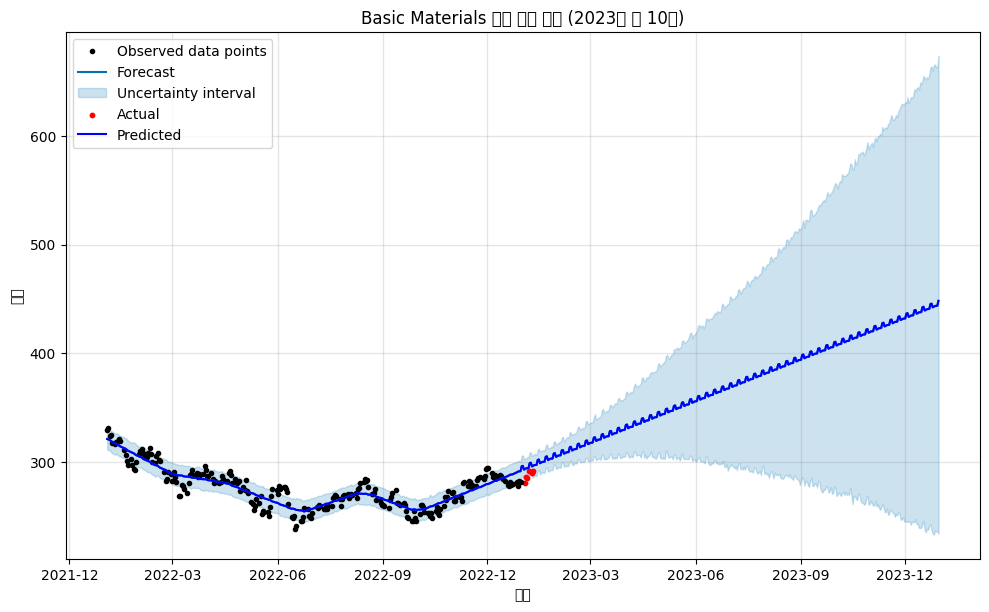

          ds           y        yhat      error
0 2023-01-03  280.917857  293.665952  12.748095
1 2023-01-04  285.885699  294.334339   8.448639
2 2023-01-05  285.151589  294.505284   9.353695
3 2023-01-06  291.793870  294.574902   2.781032
4 2023-01-09  289.799174  296.013895   6.214721
5 2023-01-10  292.277496  296.591542   4.314046


In [97]:
from prophet.plot import add_changepoints_to_plot

# 공휴일 리스트 생성
holidays = make_holidays_df(year_list=[2015, 2016, 2017, 2018, 2019], country='US')
model = Prophet(changepoint_prior_scale=0.1)
model.fit(train_data)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title('Basic Materials 산업 예측 결과 (2023년 첫 10일)')
plt.xlabel('날짜')
plt.ylabel('주가')

# 실제값과 예측값 비교
plt.scatter(test_data['ds'], test_data['y'], color='red', label='Actual', s=10)  # 실제값
plt.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted')  # 예측값
plt.legend()
plt.show()

# 예측값과 실제값 비교
comparison_df = test_data.merge(forecast[['ds', 'yhat']], on='ds', how='left')
comparison_df['error'] = comparison_df['yhat'] - comparison_df['y']

# 예측 성능 확인
print(comparison_df[['ds', 'y', 'yhat', 'error']])

14:31:38 - cmdstanpy - INFO - Chain [1] start processing
14:31:38 - cmdstanpy - INFO - Chain [1] done processing


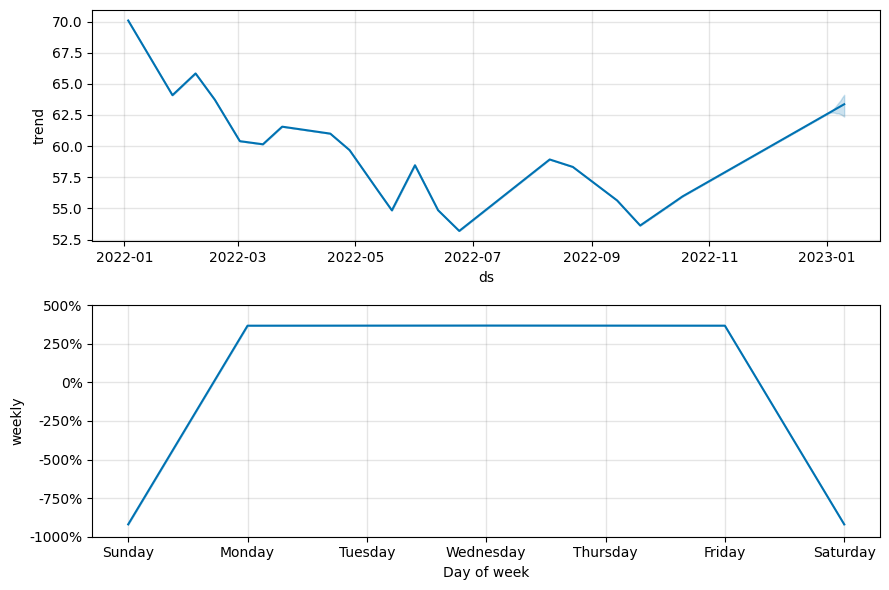

In [114]:

model = Prophet(
    changepoint_prior_scale=0.1,  # 변화점을 좀 더 쉽게 반영
    seasonality_prior_scale=15,
    #,
    #,    # 계절성을 좀 더 반영
    seasonality_mode = 'multiplicative'
)

model.fit(train_data)
fig = model.plot_components(forecast)

c:\Users\mandy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mandy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mandy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mandy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mandy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

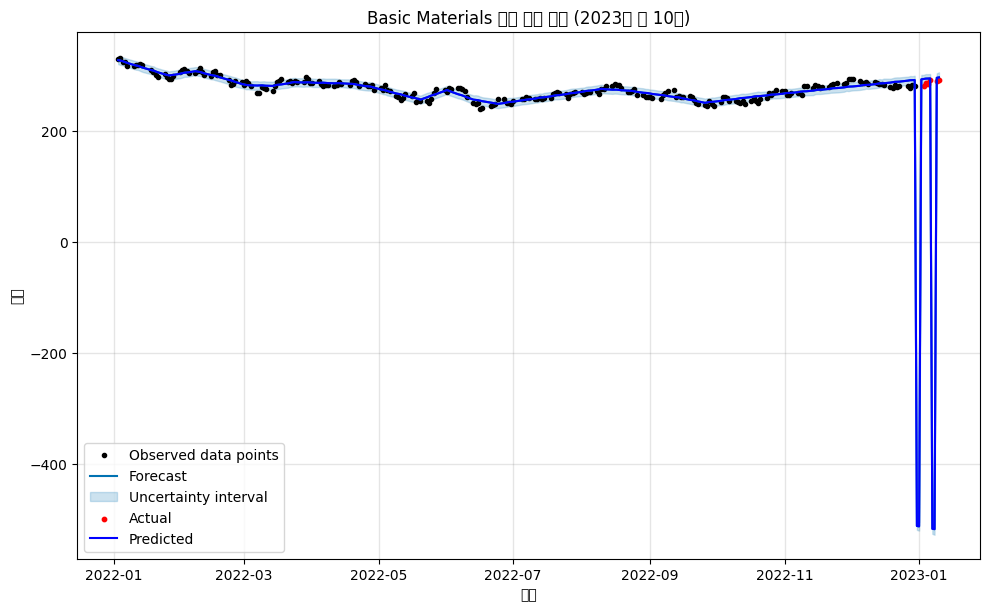

          ds           y        yhat      error
0 2023-01-03  280.917857  293.639435  12.721578
1 2023-01-04  285.885699  294.339040   8.453341
2 2023-01-05  285.151589  294.498221   9.346632
3 2023-01-06  291.793870  294.648934   2.855064
4 2023-01-09  289.799174  295.819194   6.020020
5 2023-01-10  292.277496  296.525429   4.247933


In [115]:
# 미래 데이터 생성 (2023년 첫 10일 예측)
future = model.make_future_dataframe(periods=11)  # 2023년 첫 10일 예측
forecast = model.predict(future)

# 예측 결과 시각화
fig = model.plot(forecast)
plt.title('Basic Materials 산업 예측 결과 (2023년 첫 10일)')
plt.xlabel('날짜')
plt.ylabel('주가')

# 실제값과 예측값 비교
plt.scatter(test_data['ds'], test_data['y'], color='red', label='Actual', s=10)  # 실제값
plt.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted')  # 예측값
plt.legend()
plt.show()

# 예측값과 실제값 비교
comparison_df = test_data.merge(forecast[['ds', 'yhat']], on='ds', how='left')
comparison_df['error'] = comparison_df['yhat'] - comparison_df['y']

# 예측 성능 확인
print(comparison_df[['ds', 'y', 'yhat', 'error']])

In [116]:
result = test_data.copy()
result['yhat'] = forecast.set_index('ds').loc[test_data['ds']]['yhat'].values


In [117]:

# 성능 평가 (MSE)
mse = np.sqrt(mean_squared_error(result['y'], result['yhat']))
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7.990557099249486
